# SUMMARY

${This\ notebook\ deals\ with\ the\ writing\ of\ images\ in\ the\ TFRecord\ format\ used\ for\ the\ model\ training.}$

In [2]:
import sys
import os

# Add 'src' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Define paths for data and models

from config import RAW_DIR, PROCESSED_DIR
from image_utils import read_plot_image
import tfrecord_utils
import time

2024-08-18 20:01:26.694899: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 20:01:26.695016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 20:01:26.853709: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Sample Image Visualization

Image not cropped nor resized


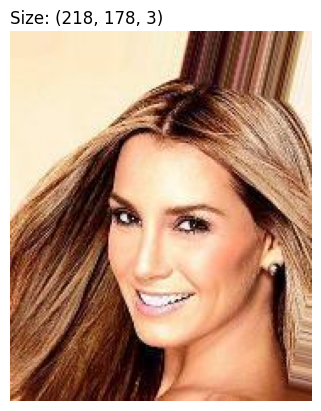

In [3]:
# Taking a sample images
# '/kaggle/input/gender-dataset/Dataset/Train/Female/000001.jpg'
image_sample_path = os.path.join(RAW_DIR, 'Dataset/Train/Female/000001.jpg')

read_plot_image(image_sample_path)

## TFRecord Writing

In [4]:
parent_files = [os.path.join(RAW_DIR, 'Dataset/Validation/Male'), os.path.join(RAW_DIR, 'Dataset/Validation/Female')]
    # '/kaggle/input/gender-dataset/Dataset/Test/Male', '/kaggle/input/gender-dataset/Dataset/Test/Female'

tfrecord_files = ['valid_male', 'valid_female']
    #'/kaggle/working/test_male', '/kaggle/working/test_female'

parent_dir = []
for name in parent_files:
    parent_dir.append(os.path.join(PROCESSED_DIR, name))

tfrecord_filename = []
for name in tfrecord_files:
    tfrecord_filename.append(os.path.join(PROCESSED_DIR, name))


start_time = time.time()
for i in range(len(parent_files)):
    label = 1 if i%2==0 else 0
    tfrecord_utils.write_as_tfrecord(
        parent_dir=parent_dir[i],
        tfrecord_filename=tfrecord_filename[i],
        label=label,
        n_shards=10,
        max_workers=3000,
    )

#     as a confirmation
    print(parent_dir[i], tfrecord_filename[i], label)
end_time = time.time()
print(f'Program took {(end_time-start_time):.2f}secs to complete')

Writing TFRecords: 100%|██████████| 8820/8820 [00:00<00:00, 58939.64it/s]


/kaggle/input/gender-dataset/Dataset/Validation/Male /kaggle/working/valid_male 1
Program took 7.63secs to complete
